In [1]:
import pandas as pd
raw_data = pd.read_csv('fraudulent.csv') 

col_list=['contain_IP','is_long','is_tinyurl','contain_at','contain_double_slash','contain_dash',
          'contain_subdomain','is_SSL','with_long_history','contain_icon','contain_ext_domain','contain_email_to',
          'allow_right_click','contain_pop_up_window','contain_Iframe','has_DNSRecord','traffic','google_rank']
all_list=['contain_IP','is_long','is_tinyurl','contain_at','contain_double_slash','contain_dash',
          'contain_subdomain','is_SSL','with_long_history','contain_icon','contain_ext_domain','contain_email_to',
          'allow_right_click','contain_pop_up_window','contain_Iframe','has_DNSRecord','traffic','google_rank','y']
lenn=len(raw_data[col_list[0]])
_data=raw_data[all_list]
for i in range(0,18):
    count0=0
    count1=1
    value=0
    for j in range(0,lenn):
        if _data[col_list[i]][j]==0:
            count0+=1
        elif _data[col_list[i]][j]==1:
            count1+=1
    if count1>count0:
        value=1
    for j in range(0,lenn):
        if _data[col_list[i]][j]!=0 and _data[col_list[i]][j]!=1:
            a=[]
            b=[]
            a.append(j)
            b.append(col_list[i])
            _data.loc[a,b]=value
data=_data[col_list]
result=_data['y']

In [2]:
from sklearn import model_selection

predictors = data.columns[:]
X_train, X_test, y_train, y_test = model_selection.train_test_split(data[predictors], result, test_size = 0.25, random_state = 1234)


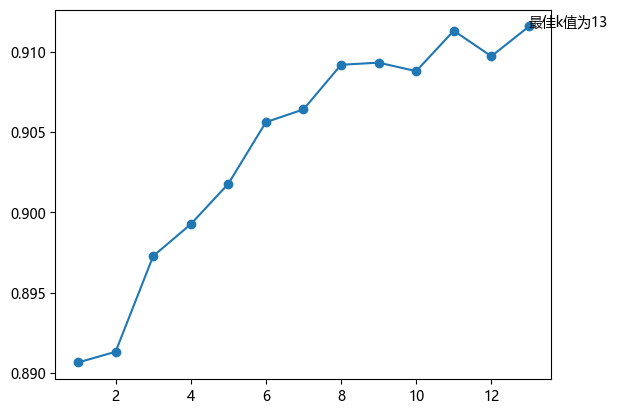

In [3]:
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt

K = np.arange(1,np.ceil(np.log2(raw_data.shape[0]))).astype(int)
accuracy = []
for k in K:
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance'), X_train, y_train, cv = 10, scoring='accuracy')
    accuracy.append(cv_result.mean())
    
arg_max = np.array(accuracy).argmax()
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(K, accuracy)
plt.scatter(K, accuracy)
plt.text(K[arg_max], accuracy[arg_max], '最佳k值为%s' %int(K[arg_max]))
plt.show()


In [4]:
from sklearn import metrics

knn_class = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn_class.fit(X_train, y_train)
predict = knn_class.predict(X_test)
cm = pd.crosstab(predict,y_test)
metrics._scorer.accuracy_score(y_test, predict)
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1718
           1       0.89      0.81      0.84       804

    accuracy                           0.91      2522
   macro avg       0.90      0.88      0.89      2522
weighted avg       0.90      0.91      0.90      2522

